
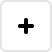
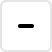
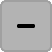
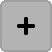
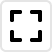
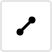
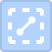
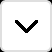
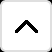
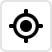
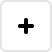
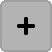
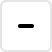
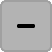
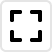
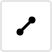
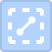
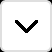
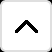
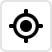

In [1]:
from lets_plot import *

LetsPlot.setup_html()

In [2]:
numeric_XY_data = dict(
    x = [0, 0.5, 1],
    y = [2, 2, 2]
)
points = geom_point(
    aes(
        'x', 'y',
        color=['x', 'y', 'z']
    ), 
    data = numeric_XY_data, size=10
)

bars = geom_bar(aes(
    ['A', 'B'],
    [1, 1.5]
), stat='identity')

In [3]:
gggrid(
    [
        ggplot() + points,
        ggplot() + bars,
    ]
)

In [4]:
ggplot() + bars + points


### Numeric Positional Data and `scale_x_discrete()`

In [5]:
gggrid([
    ggplot() + points + scale_x_discrete(),
    ggplot() + points + scale_x_discrete(breaks=['A', 'B']),
])

### Numeric Positional Data and `as_discrete` Annotation

In [6]:
points_d = geom_point(
    aes(
        as_discrete('x'), 
        'y',
        color=['x', 'y', 'z']
    ),
    data=numeric_XY_data, size=10
)

points_d_order = geom_point(
    aes(
        as_discrete('x', order=-1), 
        'y',
        color=['x', 'y', 'z']
    ),
    data= numeric_XY_data, size=10
)

gggrid([
    ggplot() + points_d,
    ggplot() + points_d + scale_x_discrete(breaks=['A', 'B']),
    ggplot() + points_d_order,
], ncol=2)


### Numeric Non-positional Data (Color) to Discrete

In [7]:
numeric_XYColor_data = dict(
    x = [0, 0.5, 1],
    y = [2, 2, 2],
    color = [10, 50, 80]
)

points_numeric_color = geom_point(
    aes(
        'x', 'y',
        color='color'
    ), 
    data = numeric_XYColor_data, size=10
)

points_numeric_color_as_discrete = geom_point(
    aes(
        'x', 'y',
        color=as_discrete('color')
    ), 
    data = numeric_XYColor_data, size=10
)

gggrid([
    ggplot() + points_numeric_color,
    ggplot() + points_numeric_color + scale_color_discrete(),
    ggplot() + points_numeric_color + scale_color_brewer(type='seq'),
    ggplot() + points_numeric_color_as_discrete + scale_color_brewer(type='seq'),
], ncol=2)


### Numeric Positional/Non-positional Data (`..count..`) to Discrete

In [8]:
lunch_data = {'time': ['Lunch','Lunch', 'Dinner', 'Dinner', 'Dinner']}

gggrid([
    ggplot(lunch_data) + geom_bar(aes(x='time', fill='..count..')),
    ggplot(lunch_data) + geom_bar(aes(x='time', fill='..count..')) + scale_fill_discrete(),
    ggplot(lunch_data) + geom_bar(aes(x='time', fill=as_discrete('..count..')))
])



### Tooltip Formatting for Numeric Positional Data (x) with `scale_x_discrete()`

In [9]:
points_with_tooltip = geom_point(
    aes(
        'x', 'y',
        color=['x', 'y', 'z']
    ), 
    data = numeric_XY_data, size=10,
    tooltips=layer_tooltips(['x'])
)

points_with_tooltip_format = geom_point(
    aes(
        'x', 'y',
        color=['x', 'y', 'z']
    ), 
    data = numeric_XY_data, size=10,
    tooltips=layer_tooltips(['x']).format('x', '{.8f} %')
)

gggrid([
    ggplot() + points_with_tooltip + scale_x_discrete(),
    ggplot() + points_with_tooltip_format + scale_x_discrete(),
], ncol=2)


#### Issue: ["How to draw geom_bands or geom_text on bar graph with discrete bars"](https://github.com/JetBrains/lets-plot/issues/1279) 


In [10]:
import numpy as np
import pandas as pd


In [11]:
np.random.seed(69)

cars = pd.DataFrame({
    'Models': ['Outback', 'Impresa', 'BRZ', 'Jetta', 'Passat', 'Matador', 'Rambler', 'Pacer'],
    'Val': np.random.uniform(0,100, size=8),
})

cars_band = pd.DataFrame({
    'Brand': ['Subaru', 'Volkswagen', 'AMC'],
    'pos_minx': [-0.5, 2.5, 4.5],
    'pos_maxx':[2.5, 4.5, 7.5],
    'M':['#41DC8E', '#E0FFFF','#90D5FF']
})


In [12]:
cars_p = (
    ggplot(cars, aes(x='Models', weight='Val'))
    + geom_band(aes(xmin='pos_minx', xmax='pos_maxx', fill='Brand', color='Brand'),
                data=cars_band,
                tooltips='none',
                alpha=0.5)
    + geom_text(aes(x='pos_minx', label='Brand'), y=100,
                data=cars_band,
                size=8, fontface='bold', hjust='left')
    + geom_bar()
    + scale_fill_manual(values=cars_band.M)
    + scale_color_manual(values=cars_band.M)
    + theme(legend_position='none', axis_title_x='blank')
    + ggsize(700, 400)
)

cars_p